# NN Main Code

IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM
-----------------------------------------------
Learning rate (alpha) value: 0.8
 
Converged after 10000 epochs with error 0.403564
 
Testing:
Sample number:1
Input: [1. 0. 0. 0. 0. 0. 0. 0.]
Output: [0.975 0.    0.    0.003 0.012 0.    0.    0.015]

Sample number:2
Input: [0. 1. 0. 0. 0. 0. 0. 0.]
Output: [0.    0.976 0.009 0.    0.01  0.    0.    0.   ]

Sample number:3
Input: [0. 0. 1. 0. 0. 0. 0. 0.]
Output: [0.    0.013 0.973 0.    0.    0.    0.008 0.025]

Sample number:4
Input: [0. 0. 0. 1. 0. 0. 0. 0.]
Output: [0.    0.    0.    0.987 0.    0.    0.007 0.003]

Sample number:5
Input: [0. 0. 0. 0. 1. 0. 0. 0.]
Output: [0.008 0.011 0.    0.    0.976 0.008 0.    0.   ]

Sample number:6
Input: [0. 0. 0. 0. 0. 1. 0. 0.]
Output: [0.    0.    0.    0.    0.005 0.984 0.009 0.   ]

Sample number:7
Input: [0. 0. 0. 0. 0. 0. 1. 0.]
Output: [0.    0.    0.007 0.01  0.    0.011 0.977 0.   ]

Sample number:8
Input: [0. 0. 0. 0. 0. 0. 0. 1.]
Outp

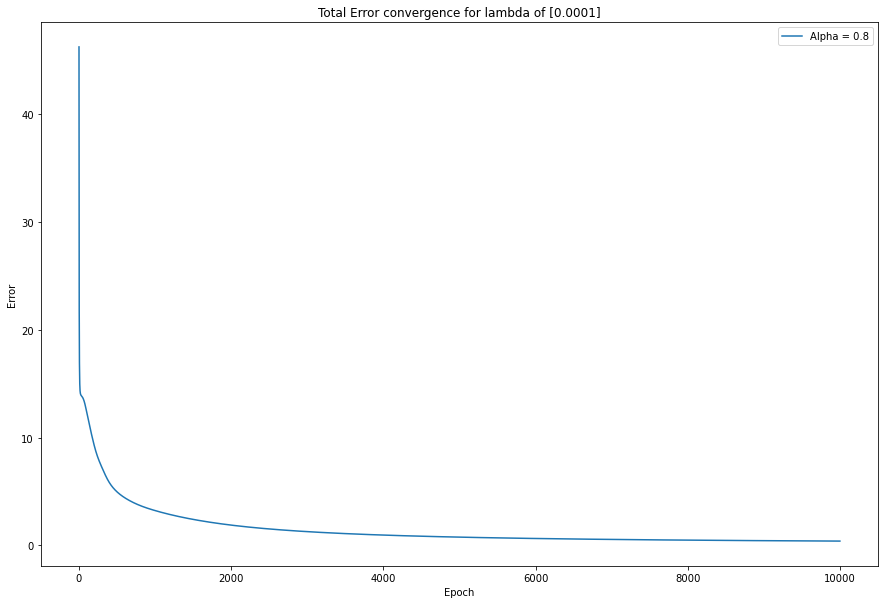

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(123)

# Training examples
X = np.eye(8) # identity matrix

# Initialize the Wegihts to the following random normal distribution
W1 = np.random.normal(0,0.01,(9, 3))
W2 = np.random.normal(0,0.01,(4, 8))


# Default settings of the hyper-parameters
learning_rate = [0.8]
LAMBDA = [0.0001]
# ALPHA = [0.8]

stored = np.zeros(( len(learning_rate), 3))
errors = [[] for i in learning_rate]

# Activation Function Sigmoid - transfer activation
def sigmoid(output):
    return 1 / (1 + np.exp(-output))

# Derivative of sigmoid function - used for Backpropagation
def d_sigmoid(output):
    return sigmoid(output)*(1 - sigmoid(output))

def forward(x):
    '''
    FORWARD PROPAGATION
    '''
    z2 = np.dot(np.append([1], x), W1) # account for bias in input layer -- tot dimension 9 x 3
    a2 = sigmoid(z2)
    z3 = np.dot(np.append([1], a2), W2) # account for bias in hidden layer -- tot dimension 4 x 8
    output = sigmoid(z3)
    return output

def backpropagation_algo(X):
    samples = X #np.random.permutation(X)
    y = samples
    totalError = 0
    '''
    Iterating though all samples
    '''
    updateW1 = np.zeros((9, 3))
    updateW2 = np.zeros((4, 8))
    for sample in samples:
        '''
        Step 1: FORWARD PROPAGATION
        '''
        a1 = np.append([1], sample).reshape(-1, 1)
        z2 = np.dot(a1.T, W1) # Input to Hidden
        a2 = sigmoid(z2)
        a2 = np.append([1], a2).reshape(-1, 1) # Activation on Hidden
        z3 = np.dot(a2.T, W2)
        yPred = sigmoid(z3)

        '''
        Step 2: BACKPROPAGATION
        '''
        # Error of Output
        delta3 = yPred - sample
        delta2 = np.multiply(np.dot(delta3, W2.T), d_sigmoid(a2.T))

        updateW2 += np.dot(a2, delta3)
        updateW1 += np.dot(a1, delta2[:, 1:])

        totalError += np.sum(np.abs(delta3))
#         totalError += np.sum(delta3)
    return totalError, updateW1, updateW2

print('IMPLEMENTATION OF THE BACKPROPAGATION ALGORITHM')
print('-----------------------------------------------')
for i,value in enumerate(learning_rate):
    print (f'Learning rate (alpha) value: {value}')
    print(' ')
    
    W1 = np.random.rand(9, 3)
    W2 = np.random.rand(4, 8)
    
    ALPHA = value

    converged = False
    epochs = 0
    
    while not converged:
        samples = X #np.random.permutation(X)
        y = samples
        epochs += 1
        '''
        Backpropagation algoritm: 
        '''
        totalError, updateW1, updateW2 = backpropagation_algo(X)
        '''
        WEIGHT UPDATES:
        1. Udate bias weights; 2. Update the weights 
        '''
        m = len(samples)  # number of samples     
        
        # 1
        W2[0] -= ALPHA/m*updateW2[0]
        W1[0] -= ALPHA/m*updateW1[0]
        
        # 2
        W2[1:] -= ALPHA*(updateW2[1:] + LAMBDA*W2[1:])/m
        W1[1:] -= ALPHA*(updateW1[1:] + LAMBDA*W1[1:])/m
        
        # Threshold for convergence (get out of the loop): 
        #if totalError <= 0.05:
         #   converged = True
        if epochs == 10000: 
            converged = True
        errors[i].append(totalError)

    print(f'Converged after {epochs} epochs with error {np.around(totalError, 6)}')
    stored[i,1] = epochs
    stored[i,2] = totalError
    print(' ')

    print('Testing:')
    counter = 0
    for sample in X:
        counter += 1
        print('Sample number:'+ str(counter))
        print(f'Input: {sample}')
        print(f'Output: {np.around(forward(sample), 3)}')
        print("")
    

    print(f'W1 i.e. Weights from input to hidden layer: \n {np.around(W1, 1)}')
    print(" ")
    print(f'W2 i.e. Weights from hidden to output layer: \n {np.around(W2, 1)}')
    print(" ")
    print('**********************************************************************')

print(f'Weight decay value (lambda): {LAMBDA}')
table = pd.DataFrame(stored, columns = ['Alpha', 'Epochs', 'totError'])
table['Alpha'] = learning_rate
print(table)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, e in enumerate(errors):
    plt.plot(e, label=f'Alpha = {learning_rate[i]}')
plt.title(f'Total Error convergence for lambda of {LAMBDA}')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()